In [90]:
import os
import sys
nb_dir = os.path.split(os.path.split(os.getcwd())[0])[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from util import basic_io
import gensim
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
pkl_path = '../../../sampled_processed_extant_posts_june_july.pkl' 
# version without bots removed (1517757, 10)
# version with bots removed (1508057, 9)
posts_df = pd.read_pickle(pkl_path)
print(posts_df.shape)
posts_df.head()
# need to delete 'BotForceOne', 'AutoModerator'!

(1508057, 9)


,orig_selftext,has_long_token,text_clean_space,text_clean_punc_lower,len_clean,tokens,tokens_clean,tokens_lemma,bigrams
2490481,Even if they hate Trump they could at least ac...,False,Even if they hate Trump they could at least ac...,even if they hate trump they could at least ac...,139,"[even, if, they, hate, trump, they, could, at,...","[even, hate, trump, could, least, acknowledge,...","[even, hate, trump, could, least, acknowledge,...","[(even, hate), (hate, trump), (trump, could), ..."
2490482,Heterosexual reproduction is a mystery to admi...,False,Heterosexual reproduction is a mystery to admi...,heterosexual reproduction is a mystery to admi...,76,"[heterosexual, reproduction, is, a, mystery, t...","[heterosexual, reproduction, mystery, admins, ...","[heterosexual, reproduction, mystery, admins, ...","[(heterosexual, reproduction), (reproduction, ..."
2490483,Were you expecting the actual pope?,False,Were you expecting the actual pope?,were you expecting the actual pope,34,"[were, you, expecting, the, actual, pope]","[expecting, actual, pope]","[expecting, actual, pope]","[(expecting, actual), (actual, pope)]"
2490484,"Be fruitful and multiply, not fruity and blow ...",False,"Be fruitful and multiply, not fruity and blow ...",be fruitful and multiply not fruity and blow a...,50,"[be, fruitful, and, multiply, not, fruity, and...","[fruitful, multiply, fruity, blow, guy]","[fruitful, multiply, fruity, blow, guy]","[(fruitful, multiply), (multiply, fruity), (fr..."
2490485,The term has completely lost all meaning. It's...,False,The term has completely lost all meaning. It's...,the term has completely lost all meaning its j...,104,"[the, term, has, completely, lost, all, meanin...","[term, completely, lost, meaning, generalizati...","[term, completely, lost, meaning, generalizati...","[(term, completely), (completely, lost), (lost..."


In [33]:
trained_models = basic_io.load_lda_models("../../../")

Loading LDA(k=5) from ../../../lda_models/lda_5_topics
Loading LDA(k=7) from ../../../lda_models/lda_7_topics
Loading LDA(k=9) from ../../../lda_models/lda_9_topics
Loading LDA(k=11) from ../../../lda_models/lda_11_topics
Loading LDA(k=13) from ../../../lda_models/lda_13_topics
Loading LDA(k=15) from ../../../lda_models/lda_15_topics
Loading LDA(k=17) from ../../../lda_models/lda_17_topics
Loading LDA(k=19) from ../../../lda_models/lda_19_topics
Loading LDA(k=21) from ../../../lda_models/lda_21_topics
Loading LDA(k=23) from ../../../lda_models/lda_23_topics
Loading LDA(k=25) from ../../../lda_models/lda_25_topics
Loading LDA(k=27) from ../../../lda_models/lda_27_topics
Loading LDA(k=29) from ../../../lda_models/lda_29_topics


In [34]:
trained_models

{5: <gensim.models.ldamulticore.LdaMulticore at 0x123f963a0>,
 7: <gensim.models.ldamulticore.LdaMulticore at 0x44936b4c0>,
 9: <gensim.models.ldamulticore.LdaMulticore at 0x44936b370>,
 11: <gensim.models.ldamulticore.LdaMulticore at 0x5151a73a0>,
 13: <gensim.models.ldamulticore.LdaMulticore at 0x44936b340>,
 15: <gensim.models.ldamulticore.LdaMulticore at 0x5151a76d0>,
 17: <gensim.models.ldamulticore.LdaMulticore at 0x5151a7910>,
 19: <gensim.models.ldamulticore.LdaMulticore at 0x5151a7b80>,
 21: <gensim.models.ldamulticore.LdaMulticore at 0x5151a7e20>,
 23: <gensim.models.ldamulticore.LdaMulticore at 0x5151a7ac0>,
 25: <gensim.models.ldamulticore.LdaMulticore at 0x5c4ad83d0>,
 27: <gensim.models.ldamulticore.LdaMulticore at 0x5c4ad86d0>,
 29: <gensim.models.ldamulticore.LdaMulticore at 0x5c4ad89a0>}

In [43]:
tokens = posts_df['tokens_lemma']
id2word = corpora.Dictionary(posts_df['tokens_lemma'])
corpus = [id2word.doc2bow(text) for text in posts_df['tokens_lemma']]
print(type(id2word))
print(type(corpus))

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'gensim.corpora.dictionary.Dictionary'>
<class 'list'>


In [47]:
cm = gensim.models.CoherenceModel.for_models(
    models = trained_models.values(), dictionary = id2word, texts = tokens, coherence = 'c_v')

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
coherence_estimates = cm.compare_models(trained_models.values())

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
def summarize_topic_coherence_by_model(coherences):
    results = []
    for num_topics, (topic_coherences, avg_coherence) in coherences.items():
        median = np.median(topic_coherences)
        results.append([num_topics, avg_coherence, median])
    results = pd.DataFrame(results, columns=['num_topics', 'avg', 'median'])
    return results

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
coherences = dict(zip(trained_models.keys(), coherence_estimates))
coherence_results = summarize_topic_coherence_by_model(coherences)
coherence_results 

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num_topics,avg,median
0,5,0.644761,0.647679
1,7,0.674709,0.662423
2,9,0.628902,0.642770
3,11,0.625531,0.653720
4,13,0.657123,0.665178
5,15,0.637342,0.650056
6,17,0.635617,0.665076
7,19,0.600818,0.602757
8,21,0.629782,0.640479
9,23,0.614402,0.622925


/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


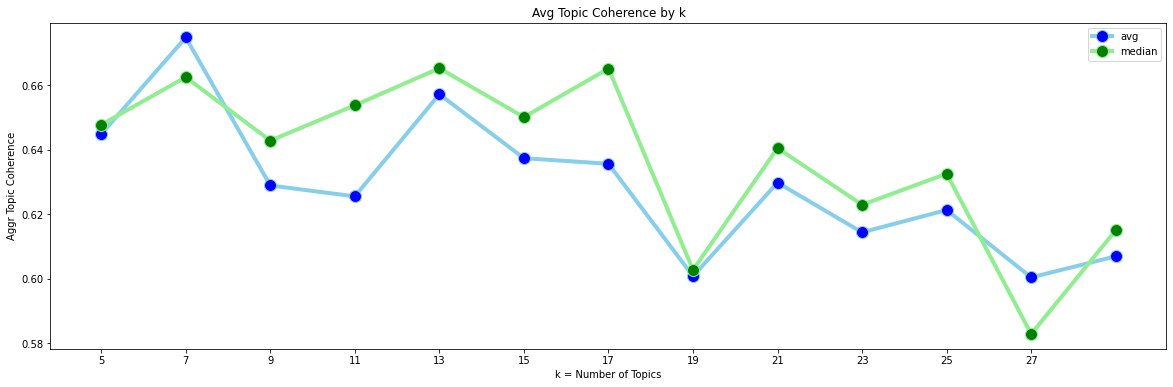

In [110]:
plt.figure(figsize=(20,6))
plt.plot('num_topics', 'avg', data=coherence_results ,
         marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('num_topics', 'median', data=coherence_results,
         marker='o', markerfacecolor='green', markersize=12, color='lightgreen', linewidth=4)
plt.xticks(np.arange(5, 29, 2.0))
plt.xlabel("k = Number of Topics")
plt.ylabel("Aggr Topic Coherence")
plt.title("Avg Topic Coherence by k")
plt.legend()
plt.show()

In [41]:
pyLDAvis.enable_notebook()

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
gensimvis.prepare(trained_models[13], corpus, id2word)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.078044 -0.052050       1        1  13.152439
12    -0.126022  0.058807       2        1  11.508117
4     -0.149609 -0.027797       3        1  11.346254
2     -0.069426  0.005323       4        1  11.322500
3     -0.143702  0.001728       5        1   8.344151
1     -0.046705  0.057187       6        1   7.183975
10    -0.081814  0.024148       7        1   6.559985
6      0.012542 -0.115512       8        1   6.458989
8     -0.051072 -0.075694       9        1   6.158800
9      0.123719 -0.113261      10        1   4.998401
0      0.029637  0.088604      11        1   4.719711
7      0.236434  0.350049      12        1   4.243174
5      0.344062 -0.201532      13        1   4.003504, topic_info=          Term           Freq          Total Category  logprob  loglift
153       year   63318.000000   63318.000000  Default  30.0000  30.0000
10       trump  104432.000000  104432.000000  Default  29.0000  29.0000
429       love   37891.000000   37891.000000  Default  28.0000  28.0000
526      white   33945.000000   33945.000000  Default  27.0000  27.0000
65    democrat   36266.000000   36266.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
1997    number    4854.051924   11839.185934  Topic13  -4.9476   2.3264
605        age    3861.203010    6729.568366  Topic13  -5.1764   2.6625
149       take    6352.507352   40650.055698  Topic13  -4.6785   1.3618
573   thousand    3682.210665    5809.198080  Topic13  -5.2239   2.7621
10       trump    4879.677010  104432.679551  Topic13  -4.9423   0.1545

[1001 rows x 6 columns], token_table=      Topic      Freq Term
term                      
132       1  0.000100   10
132      13  0.999854   10
295       1  0.131540  100
295       2  0.075042  100
295       3  0.035537  100
...     ...       ...  ...
1295      1  0.000534  yup
1295      2  0.000534  yup
1295      4  0.000267  yup
1295     10  0.000534  yup
1295     12  0.997883  yup

[3999 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 13, 5, 3, 4, 2, 11, 7, 9, 10, 1, 8, 6])

In [112]:
gensimvis.prepare(trained_models[17], corpus, id2word)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.167557  0.008011       1        1  16.066968
3      0.136711  0.116625       2        1  10.239394
11     0.101612  0.116996       3        1   8.247761
4      0.109159  0.141196       4        1   7.040413
15     0.031850 -0.114374       5        1   6.077433
13     0.120853 -0.006582       6        1   5.957621
5      0.039763  0.115541       7        1   5.955578
12     0.086957 -0.105106       8        1   5.719847
2      0.062822 -0.162855       9        1   4.548426
10     0.026058  0.091247      10        1   4.303796
6     -0.062181  0.223996      11        1   4.205131
0      0.026460 -0.218285      12        1   4.175780
16     0.007504 -0.084181      13        1   4.071070
9     -0.185412 -0.051968      14        1   3.954836
1     -0.036269 -0.138537      15        1   3.896736
7     -0.302458  0.018347      16        1   2.955928
8     -0.330986  0.049929      17        1   2.583282, topic_info=           Term           Freq          Total Category  logprob  loglift
10        trump  110209.000000  110209.000000  Default  30.0000  30.0000
153        year   62791.000000   62791.000000  Default  29.0000  29.0000
181        good   57018.000000   57018.000000  Default  28.0000  28.0000
9     president   36955.000000   36955.000000  Default  27.0000  27.0000
762       woman   36798.000000   36798.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
2998         12    2415.361437    3750.506909  Topic17  -5.2074   3.2161
138     billion    2353.439615    4368.170736  Topic17  -5.2334   3.0376
800          50    2416.113202    5174.576979  Topic17  -5.2071   2.8945
2861         40    2099.849534    3277.176805  Topic17  -5.3474   3.2110
10        trump    2987.160325  110209.453625  Topic17  -4.9949   0.0481

[1250 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
132       3  0.000095     10
132       7  0.002955     10
132      17  0.996826     10
2998      1  0.000533     12
2998      3  0.107985     12
...     ...       ...    ...
1027     11  0.000149  young
1027     12  0.005652  young
1027     13  0.000297  young
1027     14  0.000595  young
1027     15  0.004313  young

[5682 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 4, 12, 5, 16, 14, 6, 13, 3, 11, 7, 1, 17, 10, 2, 8, 9])